<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

## 1. Импорт данных и библиотек

In [163]:
import pandas as pd
import psycopg2
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [164]:
DBNAME = *
USER = *
PASSWORD = *
HOST = *
PORT = *

In [165]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 2. Знакомство с данными

#### **Схема public**

![SQL_pj2_2_1[1].png](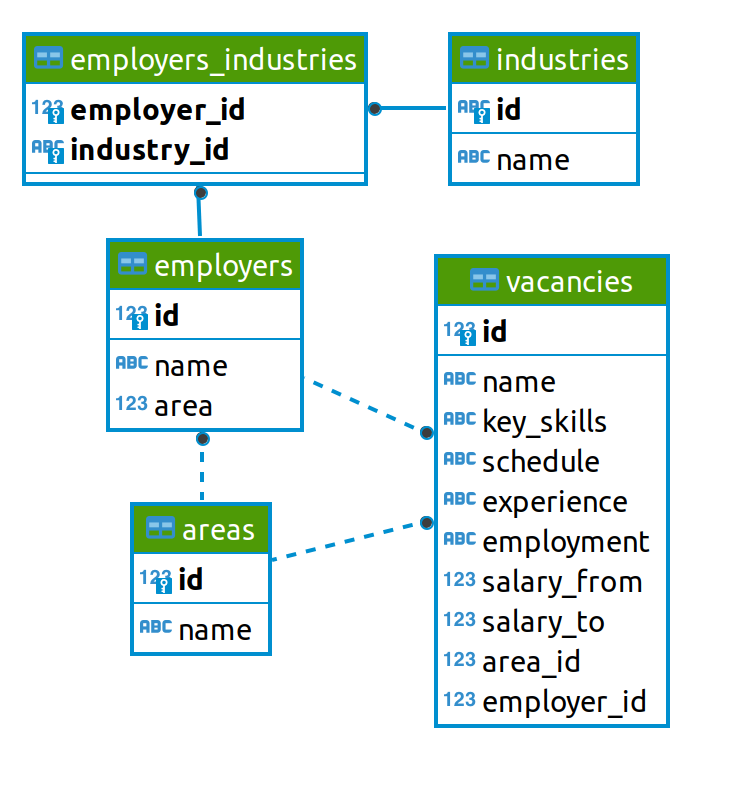)

#### vacancies

![SQL_pj2_2_2[1].png](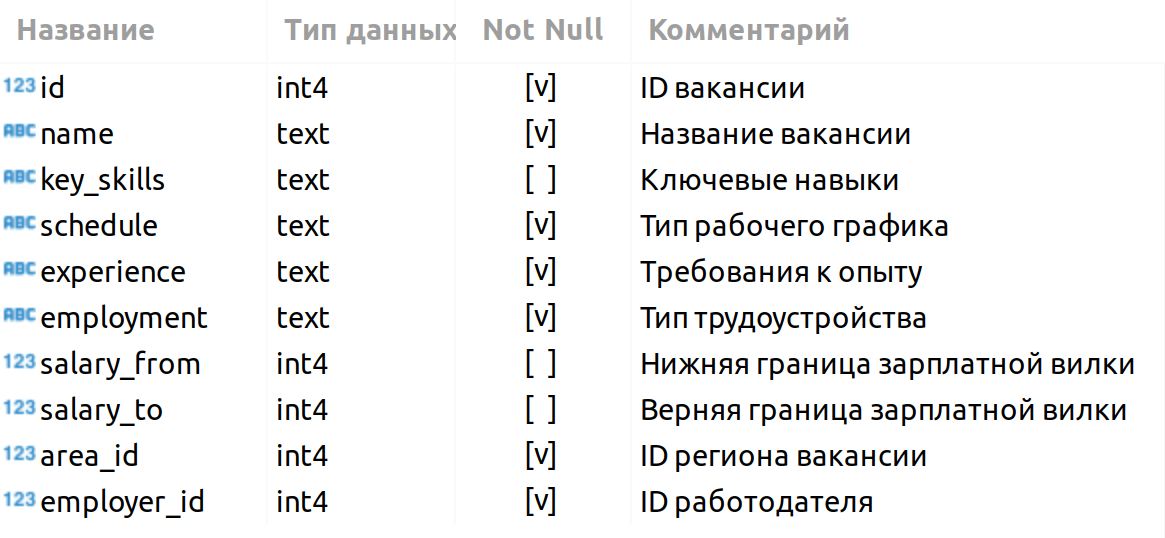)

#### areas

![SQL_pj2_2_3[1].png](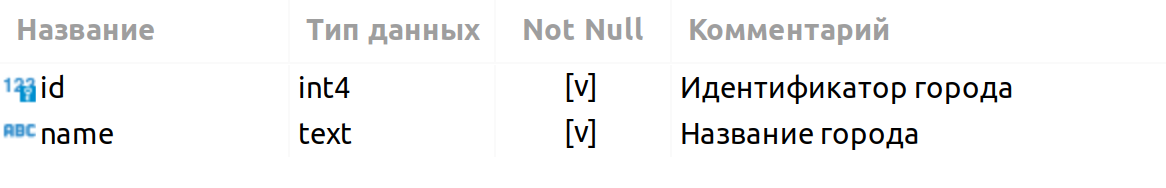)

#### employers

![SQL_pj2_2_4[1].png](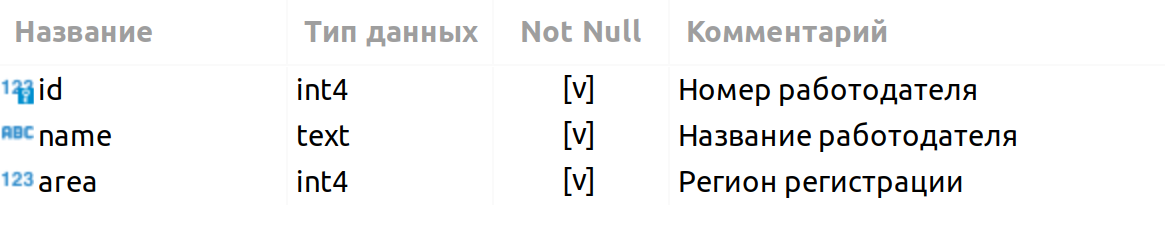)

#### industries

![SQL_pj2_2_5[1].png](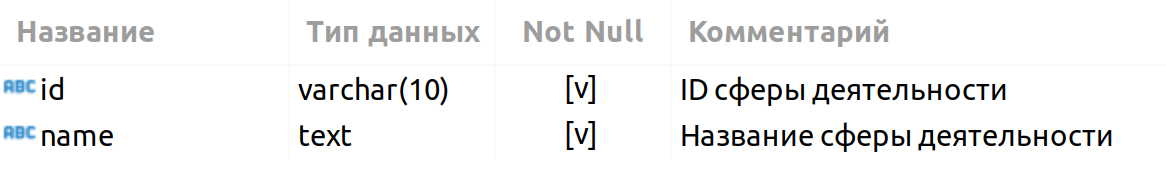)

##### employers_industries

![SQL_pj2_2_6[1].png](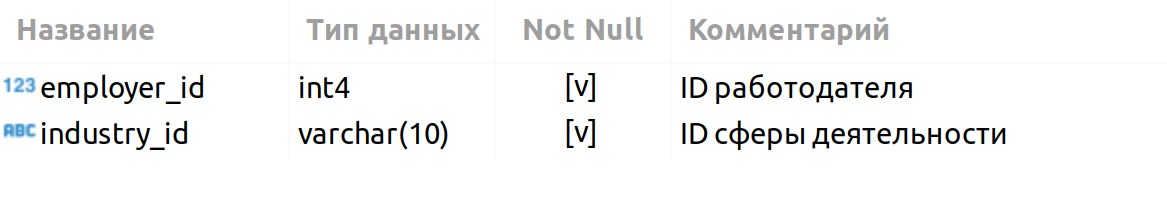)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [166]:
# текст запроса
query_3_1 = f'''
select
  count(*)
from public.vacancies
'''

In [167]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

<ipython-input-167-7f364a65e0f6>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [168]:
# текст запроса
query_3_2 = f'''
select
  count(*)
from public.employers
'''

In [169]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

<ipython-input-169-e0e2d23c59c3>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [170]:
# текст запроса
query_3_3 = f'''
select
  count(*)
from public.areas
'''

In [171]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

<ipython-input-171-11c9948ba1f3>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [172]:
# текст запроса
query_3_4 = f'''
select
  count(*)
from public.industries
'''

In [173]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

<ipython-input-173-aae953b7cc87>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [174]:
# выводы по предварительному анализу данных

- на каждого работодателя приходится, в среднем, две вакансии
- порядки значений могут говорить о том что:
1. на каждый регион приходиться как минимум несколько работодателей,
2. на каждую сферу деятельности имеется множество вакансий

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [175]:
# текст запроса
query_4_1 = f'''
select
  a.name as area,
  count(v.id) as cnt
from public.areas a
left join public.vacancies v on v.area_id = a.id
group by a.name
order by 2 desc
'''

In [176]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

<ipython-input-176-c5d40976a413>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [177]:
# текст запроса
query_4_2 = f'''
select count(*)
from public.vacancies
where salary_from is not null or salary_to is not null
'''

In [178]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

<ipython-input-178-bebb05645b92>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [179]:
# текст запроса
query_4_3 = f'''
select
  round(avg(salary_from)) s_f,
  round(avg(salary_to)) s_t
from public.vacancies
'''

In [180]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

<ipython-input-180-3cb76ea8c081>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,s_f,s_t
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [181]:
# текст запроса
query_4_4 = f'''
select
  schedule || ' - ' || employment as sc_em,
  count(*)
from public.vacancies
group by 1
order by 2 desc
'''

In [182]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

<ipython-input-182-ddd5034b1d4e>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,sc_em,count
0,Полный день - Полная занятость,35367
1,Удаленная работа - Полная занятость,7802
2,Гибкий график - Полная занятость,1593
3,Удаленная работа - Частичная занятость,1312
4,Сменный график - Полная занятость,940
5,Полный день - Стажировка,569
6,Вахтовый метод - Полная занятость,367
7,Полный день - Частичная занятость,347
8,Гибкий график - Частичная занятость,312
9,Полный день - Проектная работа,141


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [183]:
# текст запроса
query_4_5 = f'''
select
  experience,
  count(*)
from public.vacancies
group by 1
order by 2
'''

In [184]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

<ipython-input-184-868d7ae2deeb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Выводы

#### 1. Москва и Петербург особо выделяются числом вакансий по сравнению с остальными регионами. Если если разница между Петербургом и Минском составляет чуть меньше 1000 вакансий (около 38% роста), то между Москвой и Петербургом уже больше 2000 ванасий (около 85% роста).

<ipython-input-185-d98afd75210c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection).head(30)


Text(0, 0.5, 'Количество')

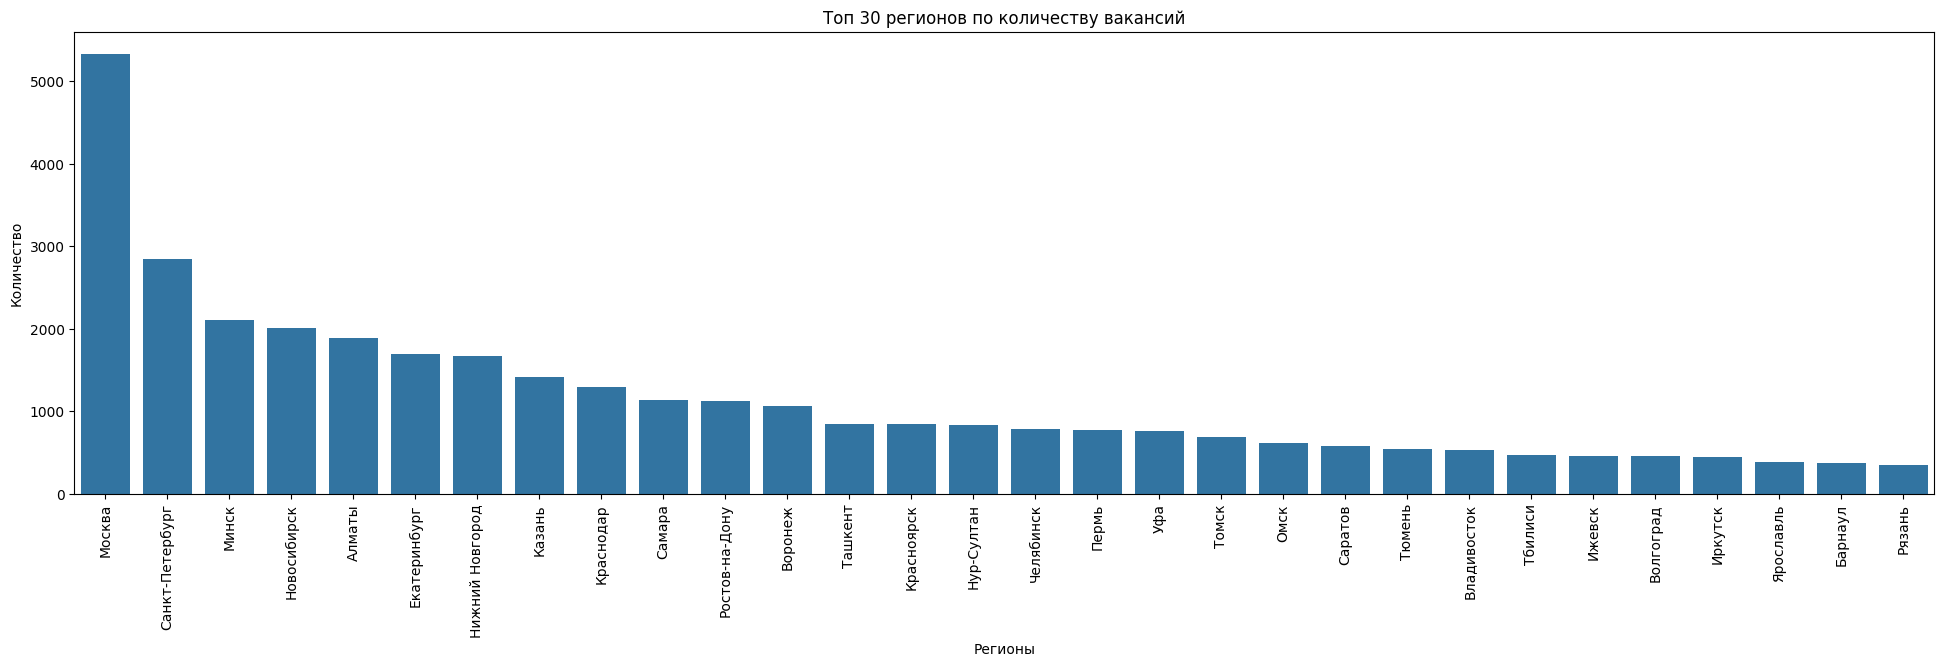

In [185]:
df = pd.read_sql_query(query_4_1, connection).head(30)
plt.figure(figsize=(24,6))
sns.barplot(
    data=df,
    x="area",
    y="cnt")
plt.xticks(rotation=90)
plt.title('Топ 30 регионов по количеству вакансий'),
plt.xlabel('Регионы'),
plt.ylabel('Количество')

#### 2. Только половина вакансий имеет численные обозначение границ предлагаемой зарплаты, что делает выборку менее информативной в анализе оплаты труда

#### 3. Работодателей интересует больше всего полная занятость, к тому же около 70% вакансий имеют значения "Полный день - Полная занятость". Можно сказать о преимущественно консервативном рынке, где работник либо физически не может работать в отрыве от производства, либо так отражаются желания работодателя.

#### 4. В пользу данной гипотезы может указывать тот факт, что работодатель в около 85% вакансиях предпочитает работника уже имеющего опыт работы. Работодатель практически не готов идти на риск, трудоустаивая человека без опыта.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [186]:
# текст запроса
query_5_1 = f'''
select
  e.name employers_name,
  count(v.id)
from public.employers e
join public.vacancies v on v.employer_id = e.id
group by 1
order by 2 desc
'''

In [187]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection).head(5)
df

<ipython-input-187-f0c145358ba8>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection).head(5)


,employers_name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [188]:
# текст запроса
query_5_2_1 = f'''
WITH count_employer as (
  select
    a.name,
    count(e.id) count_employer
  from public.areas a
  left join public.employers e on a.id = e.area
  group by 1),

count_vacancies as (
  select
    a.name,
    count(v.id) count_vacancies
  from public.areas a
  left join public.vacancies v on a.id = v.area_id
  group by 1)

select
  e.name as name,
  e.count_employer as count_employer,
  v.count_vacancies as count_vacancies
from count_employer e
join count_vacancies v on e.name = v.name
ORDER BY count_vacancies DESC, count_employer DESC
'''

In [189]:
# результат запроса
df = pd.read_sql_query(query_5_2_1, connection)
df

<ipython-input-189-bf9be5467853>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2_1, connection)


,name,count_employer,count_vacancies
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Новосибирск,573,2006
4,Алматы,721,1892
...,...,...,...
1357,Звериноголовское,0,0
1358,Зверево,0,0
1359,Саянск,0,0
1360,Светлогорск (Калининградская область),0,0


In [190]:
# текст запроса
query_5_2_2 = f'''
WITH count_employer as (
  select
    a.name,
    count(e.id) count_employer
  from public.areas a
  left join public.employers e on a.id = e.area
  group by 1),

count_vacancies as (
  select
    a.name,
    count(v.id) count_vacancies
  from public.areas a
  left join public.vacancies v on a.id = v.area_id
  group by 1)

select
  e.name as name,
  e.count_employer as count_employer,
  v.count_vacancies as count_vacancies
from count_employer e
join count_vacancies v on e.name = v.name
where v.count_vacancies = 0
ORDER BY 2 DESC
'''

In [191]:
# результат запроса
df = pd.read_sql_query(query_5_2_2, connection)
df

<ipython-input-191-27b1e551661c>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2_2, connection)


,name,count_employer,count_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [192]:
# текст запроса
query_5_3 = f'''
select
  e.name,
  count(distinct v.area_id)
from public.employers e
left join public.vacancies v on v.employer_id = e.id
group by 1
order by 2 desc
'''

In [193]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

<ipython-input-193-31d3e779128f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [194]:
# текст запроса
query_5_4 = f'''
select
  count(*)
from public.employers e
left join public.employers_industries e_i on e_i.employer_id = e.id
where e_i.employer_id is null
'''

In [195]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

<ipython-input-195-ef2fed5e214c>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [196]:
# текст запроса
query_5_5 = f'''
select
  e.name,
  count(e_i.industry_id)
from public.employers e
left join public.employers_industries e_i on e_i.employer_id = e.id
group by e.name
having count(e_i.industry_id) = 4
order by 1
'''

In [197]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

<ipython-input-197-a41bab2be398>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1131,ЮРИОН,4
1132,ЮТИП Технологии,4
1133,ЯКласс,4
1134,ЯрНео,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [198]:
# текст запроса
query_5_6 = f'''
select
  count(*)
from public.employers_industries ei
join public.industries i on i.id=ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''

In [199]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

<ipython-input-199-8e05d7ddda4a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [200]:
# код для получения списка городов-милионников
import pandas as pd
import urllib.parse

# Исходный URL
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'

# Кодируем URL в формат, пригодный для HTTP-запросов
encoded_url = urllib.parse.quote(url, safe=':/')

# Загружаем таблицы с закодированного URL
tables = pd.read_html(encoded_url, encoding='utf-8')

# Выбираем нужную таблицу (обычно первая)
cities_table = tables[0]

# Извлекаем названия городов (первый значимый столбец)
city_names = cities_table.iloc[:, 1].tolist()

print(city_names)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [201]:
city_names_str = ', '.join(f"'{city}'" for city in city_names)
print(city_names_str)

'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'


In [202]:
# текст запроса
query_5_7 = f'''
WITH count_vac as(
  select
    a.name,
    count(v.id) count_v
  from public.areas a
  join public.vacancies v on a.id = v.area_id
  join public.employers e on e.id = v.employer_id
  where e.name = 'Яндекс' and a.name in ({city_names_str})
  group by 1)

select
  name,
  count_v
from count_vac
UNION ALL
select
  'Total',
  sum(count_v)
from count_vac
order by 2
'''

In [203]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

<ipython-input-203-df759ebf7dc8>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,name,count_v
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

### Выводы

1. Топ 4 работодателя по количеству вакансий занимают компании связанные с IT сферой. При этом, 1 место занимает компания "Яндекс", имеющая почти в 4 раза больше вакансий, чем занимающий 2 место Ростелеком.
2. Москва и Санкт-Петербург занимают лидерские позиции по числу зарегистрированных работодателей. Что говорит о наибольшем обьёме рынка труда в данных регионах. Причём их количество зарегистрированных работодателей соразмерно числу открытых вакансий, что по сравнению с остальными регионами так же аномально.
3. Яндекс и Ростелеком имеют наибольший охват вакансий по регионам, что говорит о развитии инфраструктуры и увеличении охвата рынка услуг территориально по горизонтали.
4. Всего 25% вакансий у компании Яндекс зарегистрированны в городах миллионниках, что подтверждает гипотезу о планомерном горизонтальном расширении деятельности по регионам.
4. У 15% работодателей указанна сфера "Разработка программного обеспечения"

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [204]:
# текст запроса
query_6_1 = f'''
select count(*)
from public.vacancies
where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [205]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

<ipython-input-205-631a6abf7434>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [424]:
# текст запроса
query_6_2 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
where lower(name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка'
'''

In [425]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

<ipython-input-425-d5ce39ec296d>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [418]:
# текст запроса
query_6_3 = f'''
with vac_DS as (select *
from public.vacancies
where (lower(name) like '%ml%' and lower(name) not like '%html%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
where key_skills like '%SQL%'
or key_skills like '%Postgres%'
'''

In [419]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

<ipython-input-419-93be484d31ff>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [414]:
# текст запроса
query_6_4 = f'''
with vac_DS as (select *
from public.vacancies
where (lower(name) like '%ml%' and lower(name) not like '%html%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
where key_skills like '%Python%'
'''

In [415]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

<ipython-input-415-a429304bcb54>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [408]:
# текст запроса
query_6_5 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, '\t', '')) + 1), 2) AS avg_skills
from vac_DS
where key_skills IS NOT NULL AND key_skills != ''
'''

In [409]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

<ipython-input-409-99a1fdc5a2fc>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [398]:
# текст запроса
query_6_6 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

SELECT
    experience,
    ROUND(AVG(
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2
            WHEN salary_from IS NOT NULL THEN salary_from
            WHEN salary_to IS NOT NULL THEN salary_to
        END
    ), 2) AS avg_salary
FROM vac_DS
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
GROUP BY experience
ORDER BY avg_salary DESC;
  '''

In [426]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

<ipython-input-426-c2f1a4577ae9>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,От 3 до 6 лет,243114.67
1,От 1 года до 3 лет,139674.75
2,Нет опыта,74642.86


***

### Выводы

1. 480 вакансий в сфере DS или 27% от общего числа вакансий связанных с данными.
2. Из них 10.6% подходит для начала карьеры.
3. В соревновании требований SQL,Postgres или Python побеждает с большим отрывом Python, как самый универсальный. Интересно изучить, требуются ли они одновременно или действительно конкурируют.
4. Указание более 6 ключевых навыков, вероятно, говорит об желании найти наиболее универсального работника. Можно отследить, прирастает ли требования к количеству навыков для каждого уровня опыта.
5. Предлагаемая средняя заработная плата домонстрирует практически двукратный рост в первые 2 года работы, и дальше демонстрирует выскокое значение прироста, но сказать конкретно сложно, так как отрезки лет несоизмеримые.

## Общий вывод по проекту

1. Сфера интернет коммуникаций расширяется и с ним и расширяется IT отрасль.

2. Найти работу проще в Москве и Санкт-Петербурге, там больше работодателей и вакансий

In [439]:
query_i_1 = f'''
SELECT
    a.name AS area,
    ROUND(AVG(
        CASE
            WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2
            WHEN v.salary_from IS NOT NULL THEN v.salary_from
            WHEN v.salary_to IS NOT NULL THEN v.salary_to
        END
    ), 2) AS avg_salary
FROM public.vacancies v
join public.areas a on a.id = v.area_id
WHERE (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
  and ((v.name like '%ML%' and v.name not like '%HTML%')
  or lower(v.name) like '%data scientist%'
  or lower(v.name) like '%data science%'
  or lower(v.name) like '%исследователь данных%'
  or lower(v.name) like '%machine learning%'
  or lower(v.name) like '%машинн%обучен%')
GROUP BY 1
ORDER BY 2 DESC;
'''
df = pd.read_sql_query(query_i_1, connection).head(10)
df

<ipython-input-439-410b545b8a8a>:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_1, connection).head(10)


,area,avg_salary
0,Кипр,300000.00
1,Армения,268862.67
2,Черногория,233794.00
3,Турция,233794.00
4,Сербия,233794.00
5,Москва,207629.63
6,Белгород,200000.00
7,Санкт-Петербург,173335.14
8,Новосибирск,166333.33
9,Рязань,136666.67


3. Оплата труда в сфере DS лучше за границей, далее идёт в Москва, Белгород и Санкт-Петербург. Место Белгорода требует подтверждения, возможно он на лидирующих позициях из-за выбросов, или в городе развивается высококонкурентный инновационный кластер.

In [451]:
query_i_2 = f'''
SELECT
    e.name AS employer,
    ROUND(AVG(
        CASE
            WHEN v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL THEN (v.salary_from + v.salary_to) / 2
            WHEN v.salary_from IS NOT NULL THEN v.salary_from
            WHEN v.salary_to IS NOT NULL THEN v.salary_to
        END
    ), 2) AS avg_salary
FROM public.vacancies v
join public.employers e on e.id = v.employer_id
WHERE (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
and e.name = 'Яндекс'
GROUP BY 1
'''
df = pd.read_sql_query(query_i_2, connection)
df

<ipython-input-451-b6e352caa3cf>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_2, connection)


,employer,avg_salary
0,Яндекс,25884.28


In [459]:
query_i_3 = f'''
SELECT *
FROM public.vacancies v
join public.employers e on e.id = v.employer_id
WHERE ((v.name like '%ML%' and v.name not like '%HTML%')
  or lower(v.name) like '%data scientist%'
  or lower(v.name) like '%data science%'
  or lower(v.name) like '%исследователь данных%'
  or lower(v.name) like '%machine learning%'
  or lower(v.name) like '%машинн%обучен%')
and e.name = 'Яндекс'
'''
df = pd.read_sql_query(query_i_3, connection)
df

<ipython-input-459-532016f41c4e>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_3, connection)


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id,id,name,area
0,55338837,ML разработчик в Дзен,Python\tJava\tC++\tАлгоритмы и структуры данны...,Полный день,От 3 до 6 лет,Полная занятость,None,None,3,1740,1740,Яндекс,1
1,54920334,Data Scientist,Python\tSQL\tLinux\tHadoop\tАнализ данных\tCat...,Полный день,От 3 до 6 лет,Полная занятость,None,None,1,1740,1740,Яндекс,1
2,54593224,Tutor in Data Analysis and Data Science,Английский язык\tData Analysis\tData science,Гибкий график,От 1 года до 3 лет,Частичная занятость,None,None,1,1740,1740,Яндекс,1
3,54888475,ML-инженер в Вертикали,Python\tSQL\tJava\tPandas,Полный день,От 1 года до 3 лет,Полная занятость,None,None,1,1740,1740,Яндекс,1
4,54888477,ML-инженер в Вертикали,Python\tSQL\tJava\tPandas,Полный день,От 1 года до 3 лет,Полная занятость,None,None,2,1740,1740,Яндекс,1
5,55338816,ML разработчик в Дзен,Python\tJava\tC++\tАлгоритмы и структуры данны...,Полный день,От 3 до 6 лет,Полная занятость,None,None,88,1740,1740,Яндекс,1
6,55338827,ML разработчик в Дзен,Python\tJava\tC++\tАлгоритмы и структуры данны...,Полный день,От 3 до 6 лет,Полная занятость,None,None,4,1740,1740,Яндекс,1
7,54944716,ML-разработчик в группу спецпроектов поиска,Python\tC++\tMachine Learning\tАнализ данных\t...,Полный день,От 3 до 6 лет,Полная занятость,None,None,1,1740,1740,Яндекс,1
8,55462919,ML разработчик в Дзен,Python\tJava,Полный день,От 3 до 6 лет,Полная занятость,None,None,2,1740,1740,Яндекс,1


4. Комапанию Яндекс надо изучить внимательней:
- количество вакансий может говорить не только о росте компании (востановительный, экспансионный (вспоминаем количество вакансий в разных регионах)), но и о плохих условиях труда.
- среднее значение предлагаемой заработной платы менее 26 тысяч рублей.
- Имеется 8 вакансий в сфере DS, среди них нет вакансий для начинающих и никаких конкретных цифр заработной платы.

In [461]:
query_i_4 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
'''
df = pd.read_sql_query(query_i_4, connection)
df

<ipython-input-461-40ed0de0e075>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_4, connection)


,count
0,480


In [462]:
query_i_5 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
where (key_skills like '%SQL%'
or key_skills like '%Postgres%')
and key_skills like '%Python%'
'''
df = pd.read_sql_query(query_i_5, connection)
df

<ipython-input-462-15481ec3d1e4>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_5, connection)


,count
0,174


In [465]:
query_i_6 = f'''
with vac_DS as (select *
from public.vacancies
where (name like '%ML%' and name not like '%HTML%')
  or lower(name) like '%data scientist%'
  or lower(name) like '%data science%'
  or lower(name) like '%исследователь данных%'
  or lower(name) like '%machine learning%'
  or lower(name) like '%машинн%обучен%')

select count(*)
from vac_DS
where (key_skills like '%SQL%'
or key_skills like '%Postgres%')
and key_skills not like '%Python%'
'''
df = pd.read_sql_query(query_i_6, connection)
df

<ipython-input-465-cd4b1305caff>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_i_6, connection)


,count
0,27


5. Сравнение требований к наличию знаний Python и SQL(или Postgres) говорит о нецелесооразности изучения SQL или Postgres без Python. Работодателю нужен Python, а SQL или Postgres только включительно, по необходимости.

6. В дальнейшем, для изучения рынка Data Science, полезны будут следующие исследования:
- изучем оплату труда сравнивая региональные значения и значения удалённой занятости в других регионов, относительно опыта и специальности (Что выгоднее работать около дома, либо удалённо? А может разница зарплат позволит переехать?).
- Можно выделить топ требуемых навыков относительно специальности, а так же других параметров. (Что надо знать, чтобы больше платили? Может есть наиболее удачные сочитания навыков, позволяющие получить высокую оплату даже на старте?).
- Стоит создать анонимный опрос, например, после собеседования на вакансию спрашивать о предлагаемой оплате. Можно будет разбавить недостающие значения предлагаемой заработной платы средними значениями, и сравнивать честность работодателя в описании вакансии.